In [1]:
import random as rd
import time

from functools import lru_cache
from typing import Dict, List, Tuple

In [2]:
import csv

instance=[]
# ouverture en lecture du fichier csv
with open('Instance_4.csv', newline='') as fichier:
    # on crée un objet reader
    lecture = csv.reader(fichier, delimiter=',')
    # lecture et affichage des lignes:
    for ligne in lecture:
        instance.append(list(map(float,(ligne))))

In [3]:
def f(x):
    total_cost = 0
    for c in range(1,len(x)):
        total_cost += instance[x[c - 1]][x[c]]
    return total_cost

In [4]:
def NS_swapping(x, lb, ub): #lb>0 
    bound = len(x)
    xc = None    
    if (lb < bound and ub < bound):
        xc = x.copy()
        xc[lb], xc[ub] = xc[ub], xc[lb]
    return xc

def NS_insertion_before(x, lb, ub):  #lb>0 
    bound = len(x)
    xc = None
    if (lb < bound and ub < bound):
        xc = x.copy()
        xc.insert(lb, x[ub]) 
        xc.pop(ub+1)
    return xc


def NS_two_opt(x, lb, ub):
    bound = len(x)
    x1=[]
    if lb < ub and (0 < lb < bound-1 and 0 < ub < bound-1) : 
        x1=x[:lb]
        x1.extend(reversed(x[lb:ub+1]))
        x1.extend(x[ub+1:])
    return x1


In [5]:
def initialization(first_city):
    bound = len(instance)
    x=[first_city]
    sol=rd.sample(range(0, bound), bound)
    for i in range(0,len(sol)-1):
        if sol[i] == first_city:
            sol.pop(i)
    x=x+sol+x
    
    return x

In [6]:
def neighbrehood(x, k):
    bound = len(x)
    N=[]
    if(k==1):
        for i in range(1,bound-2):
            for j in range(i+1,bound-1):
                N.append(NS_swapping(x,i,j))
    elif(k==2):
        for i in range(1,bound-2):
            for j in range(i+1,bound-1):
                N.append(NS_insertion_before(x,i,j))
    elif(k==3):
        for i in range(1,bound-2):
            for j in range(i+1,bound-1):
                N.append(NS_two_opt(x,i,j))
    return N
global voisins

In [7]:
def shake(x, k):
    N=neighbrehood(x,k)
    xp=rd.choice(N)
    return xp

In [8]:
def change_neighborhood(x, xp, k):
    if f(xp) < f(x):
        x = xp
    else:
        k += 1
    return x,k


In [9]:
k_max = 3
def RVNS(x, k_max, t = 5):
    start_time = time.time() 
    while time.time() - start_time < t*60:
        k=1
        while k <= k_max:
            xp = shake(x,k)  
            x, k = change_neighborhood(x, xp, k) 
    return x

In [10]:
def first_improvement(x, l): 
    N=neighbrehood(x,l)
    for i in range(0,len(N)):
        if f(N[i])< f(x):
            x=N[i]
            break
    return x


In [11]:
l_max=2
def VND(x, l_max):
    l = 1
    while l <= l_max:
        xp = shake(x, l) 
        xp = first_improvement(x, l) 
        x,l = change_neighborhood(x, xp, l)
    return x

In [12]:
def GVNS(x, t=5, k_max=3, l_max=2):
    start_time = time.time() 
    x=RVNS(x,k_max,0.2)
    while time.time() - start_time < t*60:
        k=1
        while k <= k_max:
            x1 = shake(x,k)  
            x2 = VND(x1, l_max)
            x, k = change_neighborhood(x, x2, k)
    return x,f(x)


In [13]:
# Pour visualiser le plus court chemin

def plot(solution):    
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.offsetbox import AnchoredText

    N = len(solution)
    x = np.random.rand(N)
    y = np.random.rand(N)

    plt.figure(figsize=((10,10)))

    for i in range(1,N-1):
        plt.scatter(x[i-1], y[i-1])
        plt.annotate(solution[i],xy=(x[i-1], y[i-1]), xytext=(x[i], y[i]), arrowprops=dict(arrowstyle="<-",connectionstyle="arc3"))
        plt.scatter(x[N-2], y[N-2])    
    plt.annotate("Départ",xy=(x[N-2], y[N-2]), xytext=(x[0], y[0]),  arrowprops=dict(arrowstyle="<-",connectionstyle="arc3"))


    plt.show()


                 ********************** Résolution du TSP avec GVNS *****************************

La ville de départ : 23


1- Le temps d'execution en secondes :  60.04807925224304


n2- Le plus court chemein selon GVNS :


Oujda -> Berkane -> Saïdia -> Nador -> Tétouan -> Tanger -> Kénitra -> Khémisset -> Salé -> Rabat -> Témara -> Mohammédia -> Casablanca -> Berrechid -> Khouribga -> Béni Mellal -> Marrakech -> Safi -> El Jadida -> Lagouira -> Dakhla -> Laâyoune -> Tata -> Zagora -> Ouarzazate -> Errachidia -> Midelt -> Khénifra -> Ifrane -> Meknès -> Fés -> Taza -> Figuig -> Oujda -> 

3- Le coût du chemin : 6316.199999999999


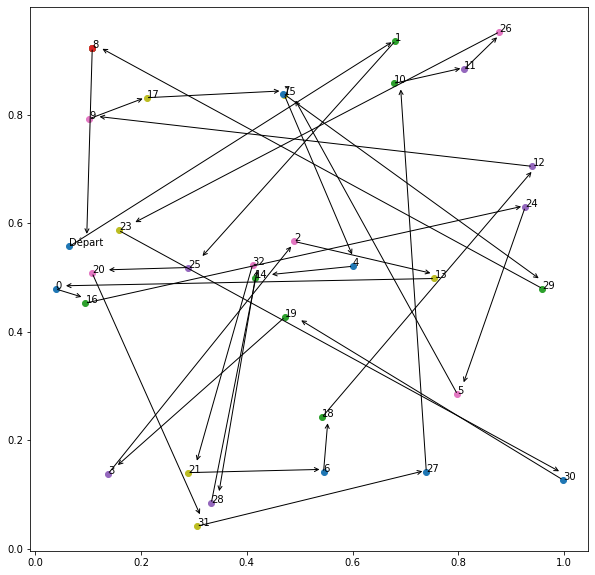

In [16]:
import os
import time

# pour la derniere instance 

print("                 ********************** Résolution du TSP avec GVNS *****************************")

while True:
    
    first_city=int(input("\nLa ville de départ : "))
    os.system("cls")
    tps1 = time.time()
    x = initialization((first_city-1))
    solution,dist_min=GVNS(x,1)
    tps2 = time.time()
    print()
    print("\n1- Le temps d'execution en secondes : ",tps2 - tps1)
    print()
    print("\nn2- Le plus court chemein selon GVNS :\n\n" )
    break
    for i in range(0,len(solution)) :
        solution[i]+=1
villes={0:'Béni Mellal',1:'Berkane',2:'Berrechid',3:'Casablanca',4:'Dakhla',5:'El Jadida',6:'Errachidia',7:'Fés',8:'Figuig',9:'Ifrane',10:'Kénitra',11:'Khémisset',12:'Khénifra',13:'Khouribga',14:'Laâyoune',15:'Lagouira',16:'Marrakech',17:'Meknès',18:'Midelt',19:'Mohammédia',20:'Nador',21:'Ouarzazate',22:'Oujda',23:'Rabat',24:'Safi',25:'Saïdia',26:'Salé',27:'Tanger',28:'Tata',29:'Taza',30:'Témara',31:'Tétouan',32:'Zagora'}
for i in range(len(solution)):
    for j in villes.keys():
        if solution[i]==j:
            print(villes[j],end=" -> ")
#print("\n\nOPTIMAL POLICY : {}".format(solution))
print("\n\n3- Le coût du chemin : {}".format(dist_min))
plot(solution)

In [ ]:
import os
import time

# Pour les instances 1 , 2 et 3

print("                 ********************** Résolution du TSP avec GVNS *****************************")

while True:
    #choice=int(input("Your choice: "))
    choice=1
    first_city = 1
    if(choice==1):
        os.system("cls")
        solution, dist_min=solve_tsp_dynamic_programming(first_city)
        break
    elif(choice==2):
        os.system("cls")
        tps1 = time.time()
        x = initialization((first_city-1))
        #temps = int(input("Time : ")) #minute
        solution,dist_min=GVNS(x,1)
        tps2 = time.time()
        print()
        print("1- Le temps d'execution en secondes : ",tps2 - tps1)
        print()
        print("2- Le plus court chemein selon GVNS :" )
        for i in range(0,len(solution)) :
            solution[i]+=1
        break
print("\n",solution)
print()
print("3- Le coût du chemin : {}".format(dist_min))
plot()

                 ********************** Résolution du TSP avec GVNS *****************************
